# KMeans

KMeans is an  unsupervised learning method(unlabeled data) that clusters a dataset into k different clusters. Each sample is assigned to the cluster with nearest mean, and then the means(centroids) and clusters are updated during an iterative optimization process.

Iterative Optimization:
* Initialize cluster centers randomly
* Repeat until converged: <br>
Update cluster lables: Assign points to the nearest cluster center(centroid) <br>
Update cluster centers(centroids): Set center to the mean of each cluster <br>

Euclidean distance: Get the distance between two vectors
$$d(p, q) = \sqrt{\sum{(p_{i} - q_{i}})^{2}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [3]:
def euclidean_distance(x1, x2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    - x1: The first point (numpy array).
    - x2: The second point (numpy array).

    Returns:
    - distance: The Euclidean distance between x1 and x2.
    """
    return np.sqrt(np.sum((x1 - x2)**2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        """
        Initialize the KMeans clustering algorithm.

        Parameters:
        - K: The number of clusters to create.
        - max_iters: The maximum number of iterations for clustering.
        - plot_steps: Whether to plot the clustering process at each step.

        Notes:
        - The clusters and centroids will be initialized during the predict method.
        """
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []

    def predict(self, X):
        """
        Perform KMeans clustering on the input data.

        Parameters:
        - X: The input data (numpy array).

        Returns:
        - labels: The cluster labels assigned to each sample in X.
        """
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize centroids randomly
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        """
        Get the cluster labels for each sample.

        Parameters:
        - clusters: List of clusters (list of lists containing sample indices).

        Returns:
        - labels: The cluster labels for each sample.
        """
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        """
        Assign samples to the closest centroids.

        Parameters:
        - centroids: The current centroids of the clusters.

        Returns:
        - clusters: List of clusters (list of lists containing sample indices).
        """
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        """
        Find the index of the closest centroid to a sample.

        Parameters:
        - sample: The sample to assign to a cluster.
        - centroids: The current centroids of the clusters.

        Returns:
        - closest_idx: The index of the closest centroid to the sample.
        """
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        """
        Calculate the new centroids from the clusters.

        Parameters:
        - clusters: List of clusters (list of lists containing sample indices).

        Returns:
        - centroids: The updated centroids of the clusters.
        """
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        """
        Check if the centroids have converged.

        Parameters:
        - centroids_old: The centroids from the previous iteration.
        - centroids: The current centroids.

        Returns:
        - converged: True if the centroids have converged, False otherwise.
        """
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        """
        Plot the data points and centroids for each step of the clustering process.
        """
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

(500, 2)
3


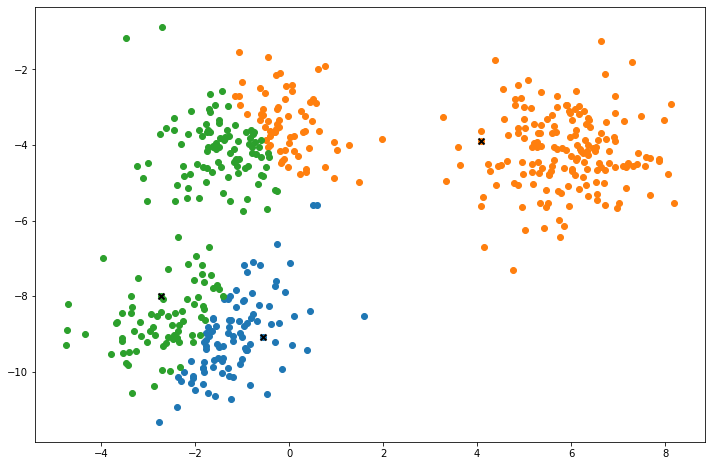

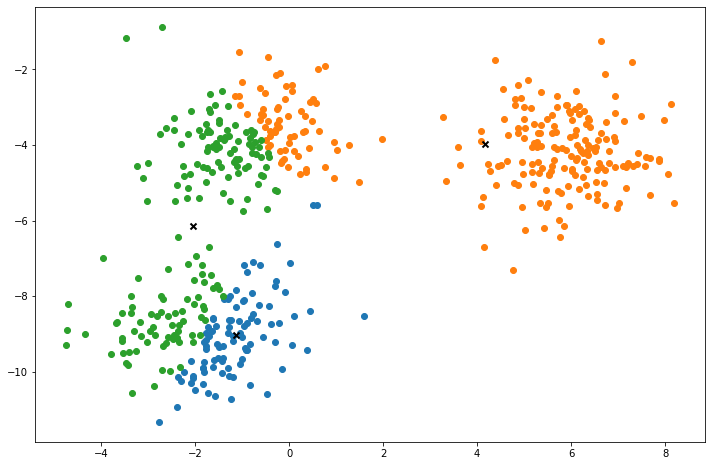

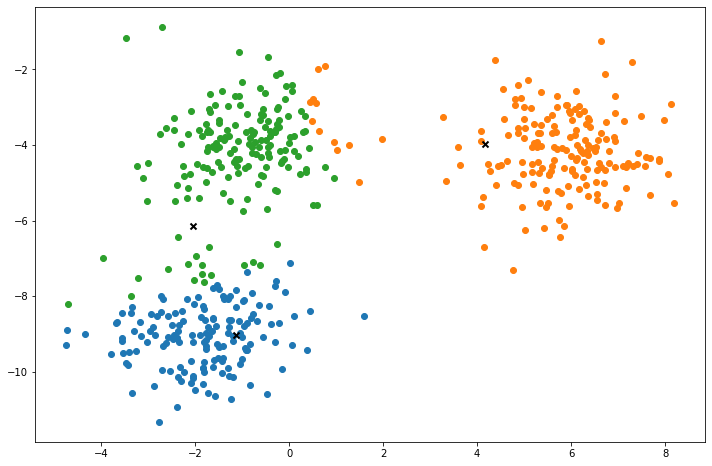

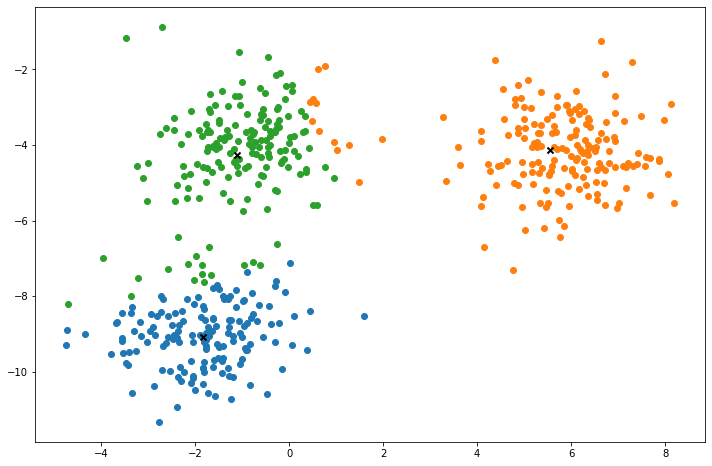

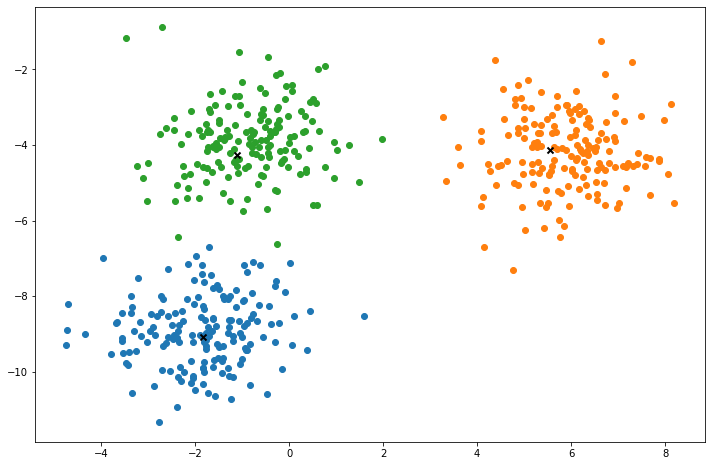

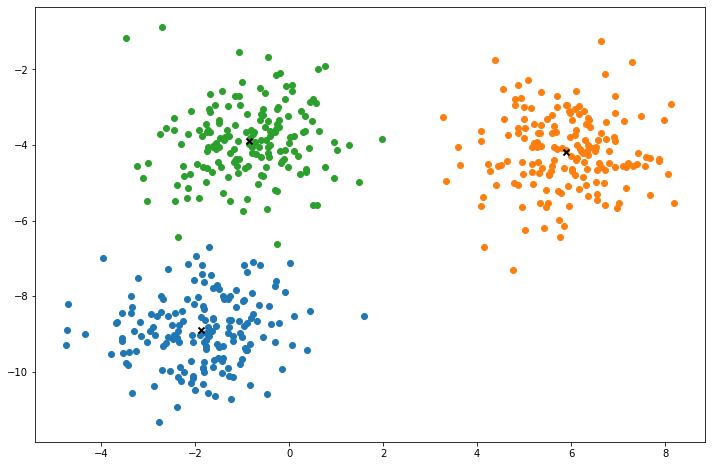

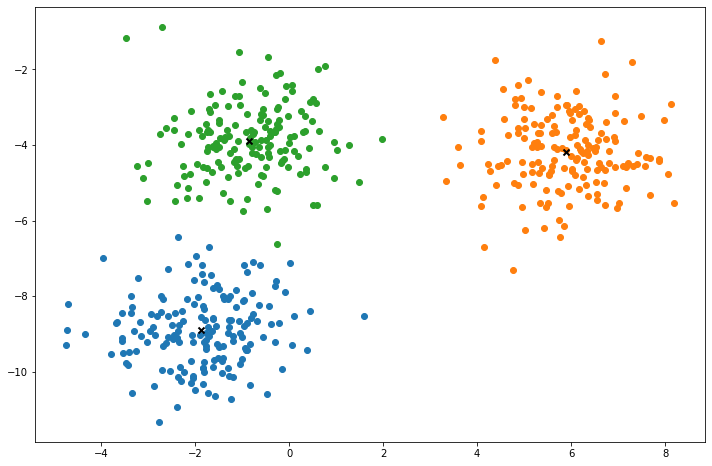

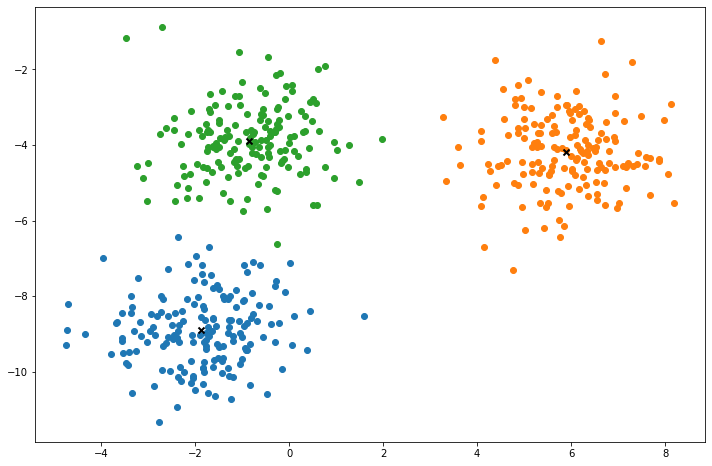

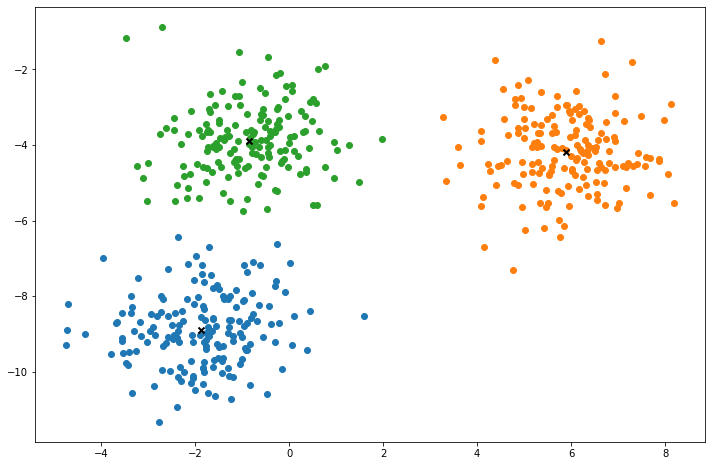

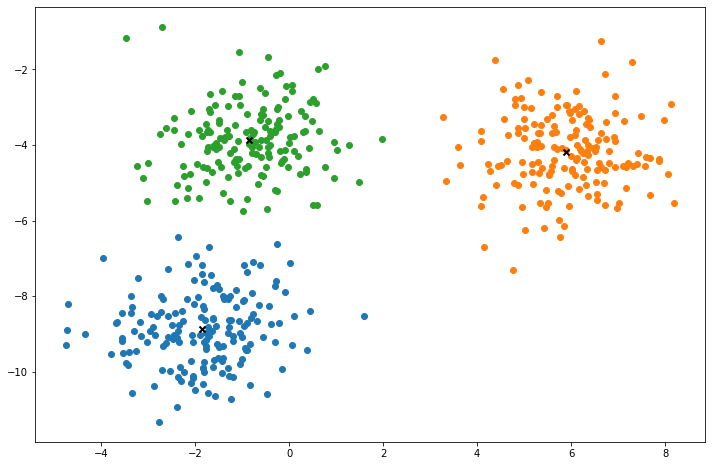

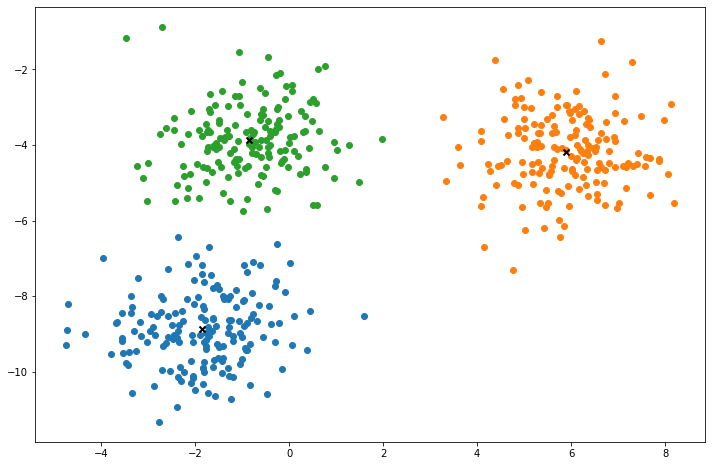

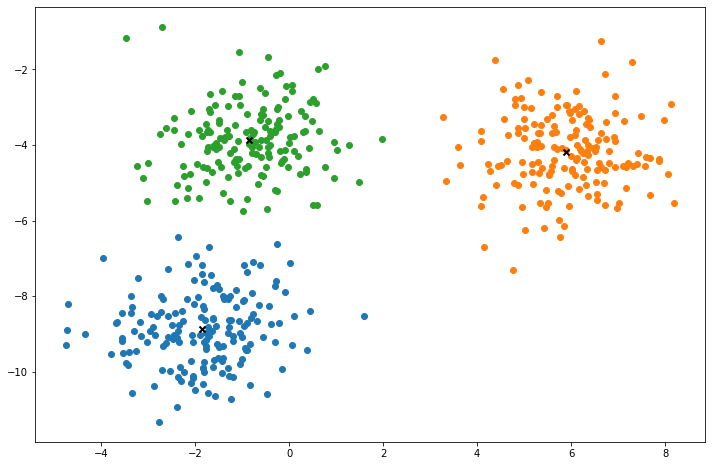

In [4]:
X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()